# Getting to know 

## The SMA
Simple is simple. No arguement. 
- It is used to show the *zaggy* data in a smooth manner
- Helps to give the overall trend of the time-series
- Used to show the intuition of the data without showing much information

In [4]:
# In pandas, just done in the simple one line of code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

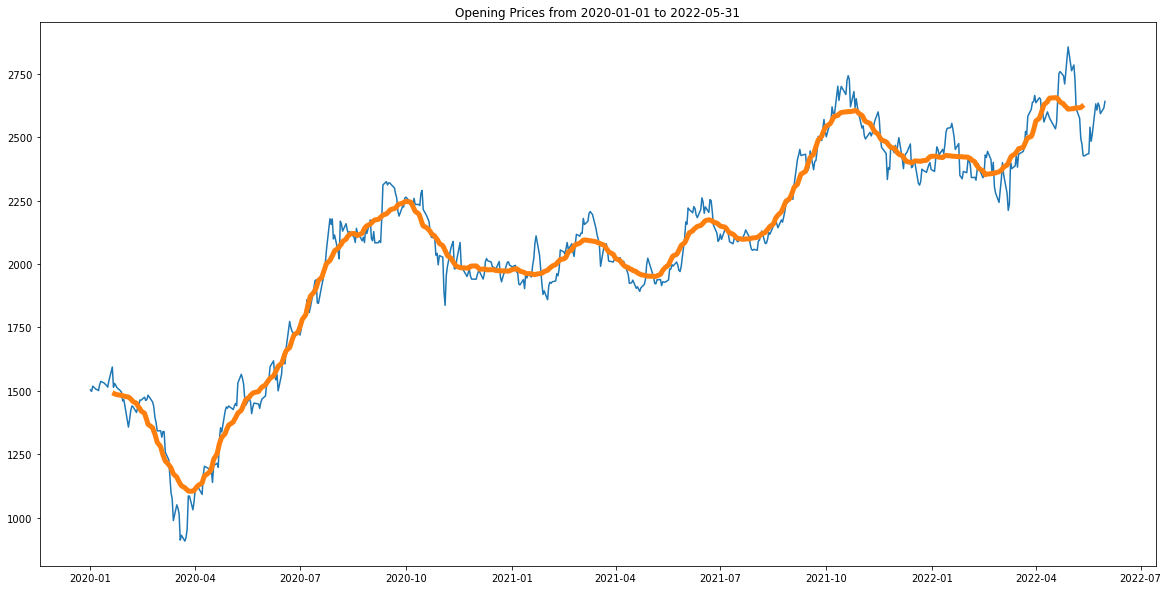

In [17]:
# initializing Parameters
start = "2020-01-01"
end = "2022-05-31"
symbols = ["RELIANCE.NS"]
  
# Getting the data
data = pdr.get_data_yahoo(symbols, start, end)
  
# Display
plt.figure(figsize=(20, 10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(data['Open'])
plt.plot(data['Open'].rolling(30, center=True).mean(), lw=5) # Single line of code

plt.show()

### But,
That is **too** simple right? For forecasting. We want something more. Let's introduce **EWMA** (I wrote that word in the first try!)

## The EWMA
This is the **Exponentially Weighted Moving Average** where the *weight* is given ***exponentially*** lower as the data point gets older.

> The moving average is designed as such that older observations are given lower weights. The weights fall exponentially as the data point gets older – hence the name exponentially weighted.

<img src="../images/EWMA_2.png">

Here, we **don't have a sliding window** as **all data points are counted** from the starting of the time-series.
<br> Putting Again,
> ## Here, we **don't have a sliding window** as **all data points are counted** from the starting of the time-series.

# 

#### Now, the model
## `1.` Simple Exponential Smoothing (SES)

<img src="../images/SES.png" height=300 width=400>

- No Trend, No Seasonality model
- **Assumes** that there are some ***fluctuations*** in the data `&` those fluctuations are **around** ***some*** constant value.
- Thus, the model tries to learn **what** the **average** value is — by using the EWMA method.
- To forecast *(I repeat)*, to forecast the value **it assumes that the <u>same EWMA</u> value will be propogated** to the future, because that was what the value was back in time. *(around which the values were fluctuating)*
- That constant value is called: **The Level** in this ETS terminology.

# $$ \text{level}(t + h) = \text{EWMA}(\text{time-series})$$

Recall, <br>
$h:$ Number of days you want to forecast in the future

#### 

## `2.` Holt Linear Trend Model

<img src="../images/Holt Linear Trend.png" height=300 width=400>

- There is Trend, No Seasonality
- See, the trend **has to be linear** — either positive or negative *(assuming not like the cosine ~ curve! 😬)*
- It uses **2** EWMAs!!
    1. For the level
    2. For the trend
- In the forecast, *(I repeat)* in the forecast, it is just the **linear combination** Level and Trend — and that is our **linear equation**!

### $$ y = \beta_0 + \beta_1x $$
#### $$ ↓ $$
### $$ \text{forecast} = \text{level} + \text{trend}\times\text{h} $$

Again, <br>
$h:$ is the number of steps in the future

So the **2** EWMAs are: <br>
# $$ \text{level}(t + h) = \text{EWMA}(\text{level of time-series}) $$
# $$ \text{trend}(t + h) = \text{EWMA}(\text{trend of time-series})$$

As can be seen in the image, **the line** goes in the upward direction. Which is the result of the `intercept = level` and `slope = trend`. *(Better than the SES model, just the horizontal line)*

# 

## `3.` Holt Winters Model

<img src="../images/Holt Winters.png" width=400 height=300>

- There is seasonality, There is trend
- It means, the constant value will stay constant for **each** year's each season.
- If the selling of book in April 2021 is +5 then it will be +5 in the April 2022 (might increase or decrease based on the trend and level) but as per to say... it will be +5.

# $$ \text{level}(t + h) = \text{EWMA}(\text{level of time-series}) $$
# $$ \text{trend}(t + h) = \text{EWMA}(\text{rend of time-series})$$
# $$ \text{seasonal}(t + h) = \text{EWMA}(\text{seasonal of time-series})$$

# 

### And, there can be different ways to forecast

**Either:** Forecast = Trend `+` Level `+` Season <br>
**Either:** Forecast = Trend `x` Level `+` Season <br>
**Either:** Forecast = Trend `+` Level `x` Season <br>
**Either:** Forecast = Trend `x` Level `x` Season <br>
Etc...

# 

# Next up,
We will **study** the SMA *(the simplest Moving Average remember! 😆)* and then will move along.
